<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/Detec%C3%A7%C3%A3o_Fraudes_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Detecção de Fraudes em Cartões de Crédito

*por Rubens Gianfaldoni*

---

Fraudes envolvendo cartões de crédito mais que dobraram em 2020. De março a julho houve uma alta de 111,8%.

O número de fraudes levou o governo federal e nove entidades privadas a lançar a campanha [#FiqueEsperto]('https://fe.seg.br/').

As maiores formas de ataque verificadas nesse período foram : [phising]('https://bit.ly/2Q5Zi7W) e [engenharia social]('https://bit.ly/3usPBzr'), seguido do [golpe do falso motoboy]('https://glo.bo/3t94hmY'), que cresceu 65% na pandemia.

*fonte: [Extra Globo]('https://glo.bo/3wzQJD9')*

<p align=center>
<img src="https://cdn-images-1.medium.com/max/1000/1*HEusmKcnGBW_qaMlvg79Rw.jpeg" width="40%">

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por [V1, V2, V3, V28]

Na [página original dos dados]('https://www.kaggle.com/mlg-ulb/creditcardfraud'), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas  [V1,V2,V3…,V28] .

----

#Iniciando a análise dos dados

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

DATA_PATH = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'

credit = pd.read_csv(DATA_PATH)

Vamos analisar as primeiras linhas do `dataset`, para melhor entendimento do estudo de caso.

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Lembrando que o nome das variáveis foram trocadas para [V1, V2...], para preservar o anonimato. 

---

Vamos seguir mostrando um resumo estatístico do `dataset`

In [4]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Como exibido abaixo, não há valores ausentes no `dataset`, o que melhora bastante nossa análise.

In [5]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print("\n{:.2f}% são fraudes, de acordo com o dataset.\n".format((credit[credit.Class == 1].shape[0] / credit.shape[0]) * 100))


0.17% são fraudes, de acordo com o dataset.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


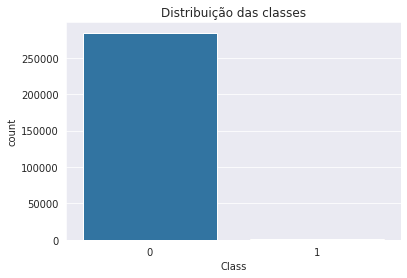

In [ ]:
fig, ax = plt.subplots()
sns.countplot('Class', data=credit, ax=ax)
ax.set_title('Distribuição das classes')

plt.show()

Vamos plotar agora gráficos de histograma para mostrar as ocorrências de *Fraude* e *Normal*, levando em consideração que `Class = 1` quer dizer *Fraude* e `Class = 0` quer dizer operação *Normal*. Usaremos a variável `Time` como base.

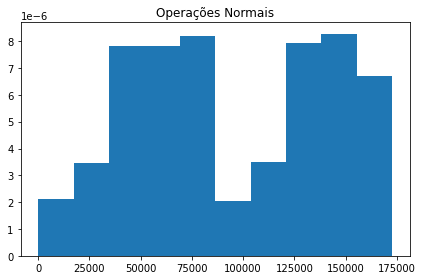

In [ ]:
time0 = credit[credit['Class'] == 0].sort_values(by='Time', ascending=False)

fig, ax = plt.subplots()

ax.hist('Time', data=time0, density=True)
ax.set_title('Operações Normais')

plt.tight_layout()


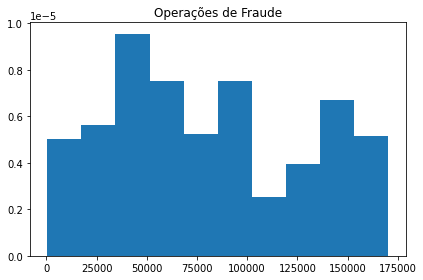

In [ ]:
time1 = credit[credit['Class'] == 1].sort_values(by='Time', ascending=False)

fig, ax = plt.subplots()

ax.hist('Time', data=time1, density=True)
ax.set_title('Operações de Fraude')

plt.tight_layout()

Agora usaremos a variável `Amount` como base.

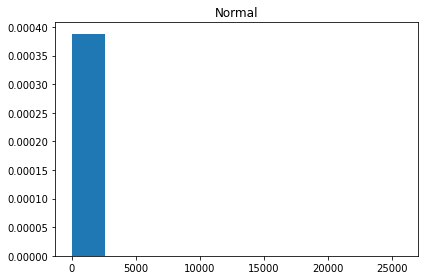

In [ ]:
amount0 = credit[credit['Class'] == 0].sort_values(by='Amount')

fig, ax = plt.subplots()

ax.hist('Amount', data=amount0, density=True)
ax.set_title('Normal')

plt.tight_layout()

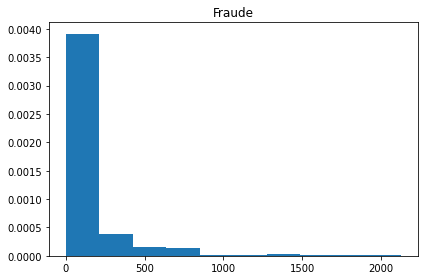

In [ ]:
amount1 = credit[credit['Class'] == 1].sort_values(by='Amount')

fig, ax = plt.subplots()

ax.hist('Amount', data=amount1, density=True)
ax.set_title('Fraude')

plt.tight_layout()

Em formato de *boxplot* abaixo, a variável `Amount` quando `Class == 1`, ou seja, houve fraude.

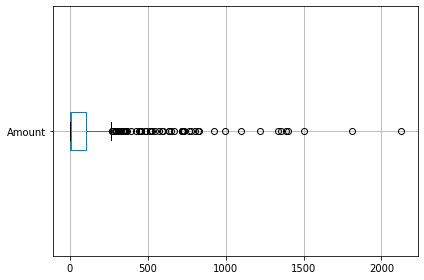

In [ ]:
fig, ax = plt.subplots()

amount1.boxplot(['Amount'], vert=False, ax=ax)

plt.tight_layout()

Um exemplo de matriz de correlação, onde a variável `Class = 1` relacionada com a coluna `Time`

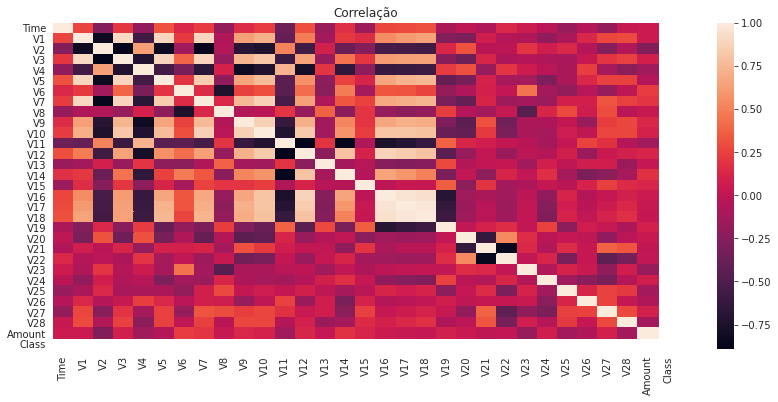

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(amount1.corr())
sns.set_style('white')
ax.set_title("Correlação")

plt.show()

Até agora conseguimos avaliar os seguintes pontos:

*   a ausência de dados nulos denota um `dataset` desbalanceado
*   colunas `Time` e `Amount` precisam ser normalizadas
*com apenas *0,17%* de fraudes, é outro indício de `dataset` desbalanceado






###Preparando os dados para o modelo de *Machine Learning*

Normalizando dos dados

Vamos pegar a variável `Time` e torná-la uma coluna alvo, dependente do resultado das outras colunas. E comparar antes e depois.

In [ ]:
X = credit.drop('Time', axis=1)
y = credit.Time

print("credit.shape:\t{}".format(credit.shape))
print("X.shape:\t{}".format(X.shape))
print("y.shape:\t{}".format(y.shape))


credit.shape:	(284807, 31)
X.shape:	(284807, 30)
y.shape:	(284807,)


Agora a coluna `Amount`, e fazer a mesma coisa

In [14]:
X2 = credit.drop('Amount', axis=1)
y2 = credit.Time

print("credit.shape:\t{}".format(credit.shape))
print("X2.shape:\t{}".format(X2.shape))
print("y2.shape:\t{}".format(y2.shape))

credit.shape:	(284807, 31)
X2.shape:	(284807, 30)
y2.shape:	(284807,)


Vamos criar 2 variáveis novas e dropar as variáveis que usaremos de alvo para as demais, no caso `Time` e `Amount`

In [13]:
new_credit = credit.copy()

new_scaler = StandardScaler()

new_credit['new_amount'] = new_scaler.fit_transform(new_credit['Amount'].values.reshape(-1, 1))
new_credit['new_time'] = new_scaler.fit_transform(new_credit['Time'].values.reshape(-1, 1))

new_credit.drop(['Time', 'Amount'], axis=1, inplace=True)

E o novo `dataset` fica assim:

In [ ]:
new_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,new_amount,new_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Vamos começar a separar os eixos X e Y, a fim de iniciar o treino e teste.

In [15]:
X = new_credit.drop('Class', axis=1)
y = credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Neste estudo vamos garantir uma proporção 50/50 para o conjunto de treino e teste.

###Balanceando os dados

In [16]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


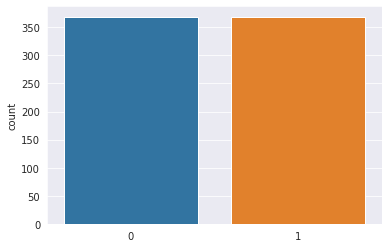

In [18]:
balance = RandomUnderSampler()

X_balance, y_balance = balance.fit_sample(X_train, y_train)

sns.countplot(y_balance);

In [31]:
print(pd.Series(y_balance).value_counts())

1    369
0    369
dtype: int64


**Acima temos o conjunto balanceado e abaixo o conjunto antigo. Podemos seguir agora com o conjunto balaceado, o que garante uma precisão muito melhor para a análise.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


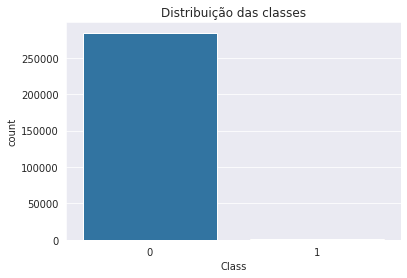

In [76]:
fig, ax = plt.subplots()
sns.countplot('Class', data=credit, ax=ax)
ax.set_title('Distribuição das classes')

plt.show()

##Modelo de classificação

Vamos fazer os modelos de treino e previsões.

In [71]:
model = LogisticRegression()

model.fit(X_balance, y_balance)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [72]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.954     0.977     71079
           1      0.034     0.919     0.065       123

    accuracy                          0.954     71202
   macro avg      0.517     0.937     0.521     71202
weighted avg      0.998     0.954     0.975     71202



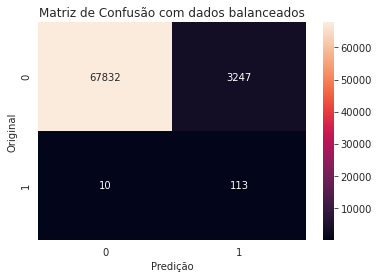

In [73]:
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='')

ax.set_title("Matriz de Confusão com dados balanceados")
ax.set_ylabel("Original")
ax.set_xlabel("Predição")

plt.show()

##Conclusão

Em um modelo desbalanceado as chances de ocorrer um erro é muito grande, visto a discrepância do primeiro gráfico em relação a variável `Class`. 

A Matriz de confusão mostrou que:

*   quando não houve fraude, o modelo acertou `67832`
*   quando houve fraude, e o modelo disse que havia fraude `113`
*   quando não houve fraude e o modelo disse que havia fraude `3247`
*   quando houve fraude e o modelo disse que não havia fraude `10`


Portanto, com os dados normalizados e balanceados, esse tipo de modelo logístico ou classificação, tem uma acurácia de `95,4%`.

